In [2357]:
import numpy as np
import csv
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

## Define Model

$$ \sigma(w,X) = \frac{1}{1 +e^ {-w.X}}$$ 

In [2315]:
def sigmoid(w, X):
    return (1. / (1. + np.exp(-np.dot(X,w))))

  $$ Loss = \frac{1}{m}.[- t^{T}.\ln(\sigma(w,X)) - (1 - t^{T}).\ln(1-\sigma(w,X)] + \frac{\lambda}{2.m}.w^{T}.w$$

In [2316]:
def loss(w, X, t, lam):
    m = X.shape[0]
    y = sigmoid(w,X)  
    J = (1. / m) *(- np.dot(t.T,np.log(y)) - np.dot((1. - t.T),np.log(1. - y)))
    regularizer = (lam / (2. * m)) * np.dot(w.T, w)
    J += regularizer
    return J

$$ \nabla Loss = \frac{1}{m}[(\sigma(w,X) - t)^{T}X]^T + \frac{\lambda}{m}w $$

In [2317]:
def partial(w, X, t, lam):
    m = X.shape[0]
    y = sigmoid(w, X)
    d = (1. / m) * np.dot((y - t).T, X).T  
    reg = (lam / m) * w
    d = d + reg
    return d

$$w_{t+1} = w_{t} - \eta  t^{-\alpha} \nabla Loss$$

In [2318]:
def update_parameter(w, d, iteration, rate = .2, a = -.9):
    w = w - rate * (iteration ** a) * d
    return w

In [2319]:
#define gradient descent
def gradient_descent(w, X, t, lam, max_step = 1000, convergence = 0.00001):
    counter = 1
    L = loss(w, X, t, lam)
    L_prev = L + 10
    #update w until loss converges
    while(abs(L - L_prev) > convergence) and (counter <= max_step):
        L_prev =  L
        L = loss(w, X, t, lam)
        d = partial(w, X, t, lam)
        w = update_parameter(w, d, counter)
        counter += 1
        
    w_norm = np.linalg.norm(w)
    results = {"Weights": w, "Limit" : L, "W_norm": w_norm}
    return results
    
    

In [2320]:
#find optimum lambda
def seek_lambda(X, t, stop, step_size = 1, start = 0):
    #get index lists for split
    kf = KFold(n_splits = 10)
    #find total steps within interval
    total_steps = int((stop - start) / step_size)
    lam = start
      
    results = {}
    for i in range(total_steps):
        loss_results = []
        w_results= []
        w= np.asarray([1 for i in range(max_features)])
        #w = np.random.random([max_features])
        #cross validate
        for train_index, test_index in kf.split(X):
            X_train, V, X_target, V_target = X[train_index, :], X[test_index, :], t[train_index], t[test_index] 
            gd = gradient_descent(w, X_train, X_target, lam)
            w = gd["Weights"]
            w_n = gd["W_norm"]
            validation_loss  = loss(w, V, V_target, lam = 0)
            loss_results.append(validation_loss)
            w_results.append(w_n)
        #average the loss    
        L = np.mean(loss_results)
        W = np.mean(w_results)
        results[lam] = [L,W]
        lam += step_size
        if lam%100 ==0:
            print(lam)
    return (results)

In [2321]:
#define rule
def label_rule(prob):
    if prob>0.5:
        return 1
    else : 
        return 0 


## Fit Model using sample

In [2322]:
#read in data
f = open("./train.csv", "r", errors='ignore')
raw_data = list(csv.reader(f))[1:]
print(raw_data[0:5])

[['ham', 'Hey you can pay. With salary de. Only  &lt;#&gt; .   '], ['ham', 'What happen dear. Why you silent. I am tensed   '], ['ham', 'I can do that! I want to please you both inside and outside the bedroom...   '], ['ham', 'I wonder how you got online, my love ? Had you gone to the net cafe ? Did you get your phone recharged ? Were you on a friends net ? I think of you, boytoy   '], ['ham', 'So now my dad is gonna call after he gets out of work and ask all these crazy questions.   ']]


In [2323]:
#seperate label and features
target, X = zip(*raw_data)
X =list(X)
t = np.asarray(target)

In [2324]:
#convert target to numeric
le =LabelEncoder() #get model
fit =le.fit(target) #fit model
t  = fit.transform(t) #transform

In [2325]:
X[1]

'What happen dear. Why you silent. I am tensed   '

In [2326]:
t[1]

0

In [2327]:
# convert features to numeric
max_features = 150 #define max features allowed

In [2328]:
# convert features to numeric
vectorizer = TfidfVectorizer(ngram_range = (2,4), max_features = max_features, stop_words = "english")
X  = vectorizer.fit_transform(X).toarray()
X.shape

(3000, 150)

In [2329]:
#Sampling
#s = 1000 #define sample size
#index =np.random.randint(1,3000,s) #random sample
#slice for prototype

#X = X[index, :]
#t = t[index]
#X.shape
#t.shape

In [2331]:
x = list(test.keys())
y = list(test.values())
losses, norm = zip(*y)

In [2332]:
best_lambda = losses.index(min(losses))
best_lambda

13880

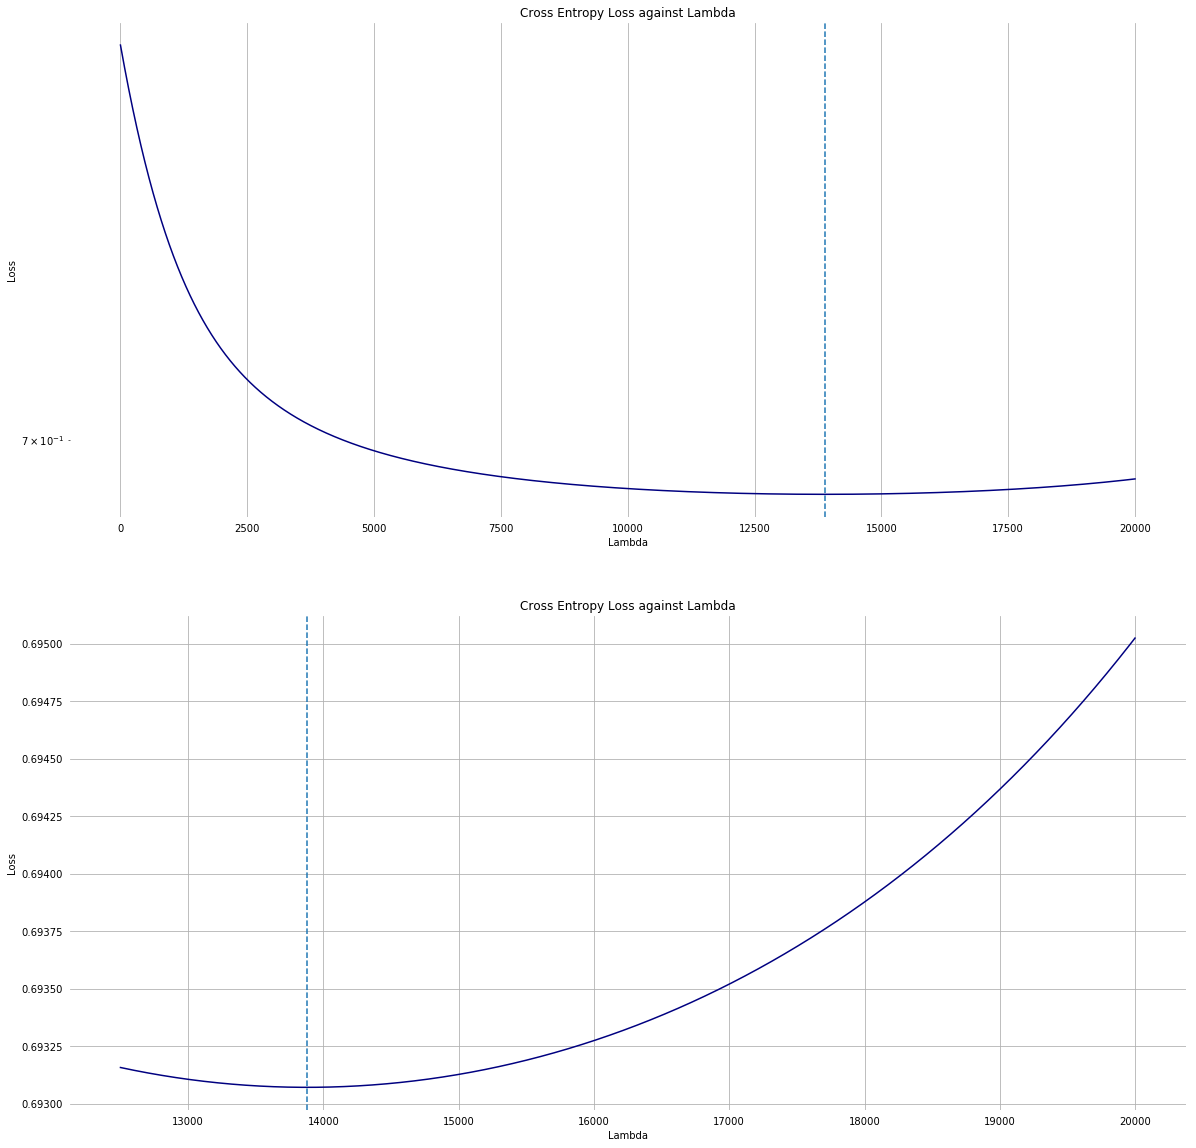

In [2333]:
%matplotlib inline
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.semilogy(x[0:20000], losses[0:20000],color='navy')
ax1.tick_params(bottom='off',top='off',left='off',right='off')
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.axvline(x = best_lambda, ls = "dashed")
ax1.set(title='Cross Entropy Loss against Lambda', ylabel='Loss', xlabel = "Lambda")
ax2.plot(x[12500:20000], losses[12500:20000],color='navy')
ax2.tick_params(bottom='off',top='off',left='off',right='off')
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.axvline(x = best_lambda, ls = "dashed")
ax2.set(title='Cross Entropy Loss against Lambda', ylabel='Loss', xlabel = "Lambda")

ax1.grid()
ax2.grid()
#plt.stem(min_index,loss[min_index])
plt.show()

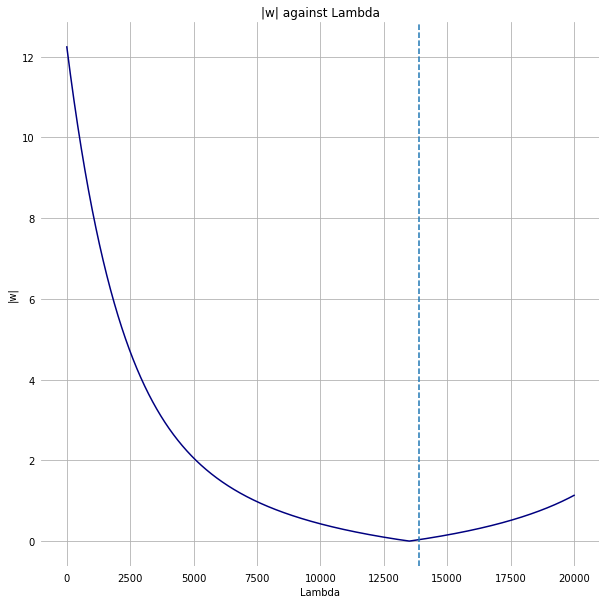

In [2334]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(x[0:20000], norm[0:20000],color='navy')
ax1.tick_params(bottom='off',top='off',left='off',right='off')
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.axvline(x = best_lambda, ls = "dashed")
ax1.set(title='|w| against Lambda',
           ylabel='|w|', xlabel = "Lambda")
ax1.grid()
plt.show()

## Predict Test Data

In [2346]:
w= np.random.randn(max_features)
result  = gradient_descent(w, X, t, best_lambda)

In [2347]:
#read in data
f = open("./test.csv", "r", errors='ignore')
raw_test = list(csv.reader(f))[1:]
print(raw_test[0:5])

[['ham', 'Not..tel software name..   '], ['spam', 'As a SIM subscriber, you are selected to receive a Bonus! Get it delivered to your door, Txt the word OK to No: 88600 to claim. 150p/msg, EXP. 30Apr   '], ['ham', "Sorry i cant take your call right now. It so happens that there r 2waxsto do wat you want. She can come and ill get her medical insurance. And she'll be able to deliver and have basic care. I'm currently shopping for the right medical insurance for her. So just give me til friday morning. Thats when i.ll see the major person that can guide me to the right insurance.   "], ['spam', 'Congrats! Nokia 3650 video camera phone is your Call 09066382422 Calls cost 150ppm Ave call 3mins vary from mobiles 16+ Close 300603 post BCM4284 Ldn WC1N3XX   '], ['ham', "No chikku nt yet.. Ya i'm free   "]]


In [2348]:
target_test, X_test = zip(*raw_data)
X_test =list(X_test)
t_test = np.asarray(target_test)

In [2349]:
t  = fit.transform(t_test) #transform

In [2350]:
# convert features to numeric
X_test  = vectorizer.transform(X_test).toarray()
X_test.shape

(3000, 150)

In [2351]:
w = result["Weights"]

In [2352]:
y = sigmoid(w,X_test)

In [2353]:
y_hat = [label_rule(i) for i in y]

In [2354]:
np.histogram(y_hat)

(array([2671,    0,    0,    0,    0,    0,    0,    0,    0,  329]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

In [2358]:
confusion_matrix(t, y_hat, labels = [0,1])

array([[2384,  199],
       [ 287,  130]])

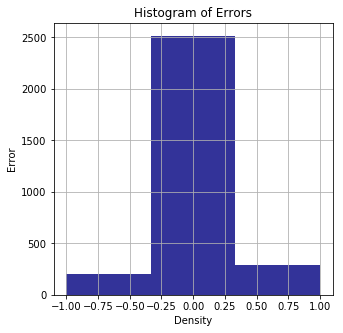

In [2356]:
%matplotlib inline
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)

ax1.hist((t-y_hat), bins =3 , color='navy', alpha =0.8 , align = "mid" )
ax1.set(title='Histogram of Errors',
           ylabel='Error', xlabel = "Density")

ax1.grid()
plt.show()

In [2345]:
vectorizer.get_feature_names()

['08000839402 call2optout',
 '1000 cash',
 '12hrs 150ppm',
 '150p msg',
 '2000 prize',
 '2000 prize guaranteed',
 '2003 account',
 '2003 account statement',
 '2lands row',
 '2nd attempt',
 '2nd attempt contact',
 '3030 valid',
 '3030 valid 12hrs',
 '350 award',
 '500 pounds',
 '750 anytime',
 '800 redeemed',
 '800 redeemed points',
 'account statement',
 'attempt contact',
 'await collection',
 'bonus caller',
 'bonus caller prize',
 'caller prize',
 'camcorder reply',
 'camcorder reply 08000930705',
 'camera phones',
 'chance win',
 'claim code',
 'claim ur',
 'come home',
 'cs apply',
 'customer service',
 'customer service representative',
 'customer services',
 'decimal gt',
 'don know',
 'dont know',
 'double mins',
 'draw shows',
 'draw shows won',
 'dun haf',
 'feel like',
 'free entry',
 'free mobile',
 'free text',
 'good afternoon',
 'good day',
 'good morning',
 'good night',
 'great day',
 'gt lt',
 'gt min',
 'gt mins',
 'gt minutes',
 'guaranteed 1000',
 'guaranteed 1000 